In [2]:
import pandas as pd
import numpy as np 
import itertools
import nltk


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [7]:
reviews = pd.read_csv('../../test_data/test_strains_reviews.csv')

In [21]:
r = reviews.set_index('Unnamed: 0')
rr = r.T

rr.columns

Index(['hybrid/blue-dream', 'sativa/sour-diesel', 'hybrid/gsc',
       'sativa/green-crack', 'hybrid/og-kush', 'indica/granddaddy-purple',
       'hybrid/original-glue', 'hybrid/white-widow'],
      dtype='object', name='Unnamed: 0')

## Create some lists of reviews

In [18]:
blu_dream = rr['hybrid/blue-dream'].dropna().tolist()

In [19]:
sour_d =  rr['sativa/sour-diesel'].dropna().tolist()

['best looking bud opinion im love dense bud like pe strong smell difficult mask strain staple smoker bucket list definitely something try atleast fairly strong uniqe attribute still average topshelf smoke',
 'ohhhhhh sour diesel friend oooooo boy enjoying one big hit pipe away friend damnso took minute taking hit felt effect tell liking muchi would say right im uplifted lot happier happier thats happiness close ecstatic happiness make',
 'shit fucking amazing stress motivation ended writing short book god know',
 'star plus good adhd especially short euphoria wear musical upbeat moderate paranoia metacognitively checked appetite suppressant',
 'strong high long lasting sticky',
 'always favorite love skunky taste find best strain maintain productive day use unwinding weed',
 'one favorite sativas classic enough said',
 'sour diesel extremely potent pungent strain grows extremely well fast arkansas',
 'sour solid sativa smoke little harsh beautiful fat bud easy come there reason popula

In [20]:
gsc =rr['hybrid/gsc'].dropna().tolist()
green_crack = rr['sativa/green-crack'].dropna().tolist()
ogk = rr['hybrid/og-kush'].dropna().tolist()
gdp = rr['indica/granddaddy-purple'].dropna().tolist()

In [22]:
glue = rr['hybrid/original-glue'].dropna().tolist()
ww = rr['hybrid/white-widow'].dropna().tolist()

In [26]:
all_strains = blu_dream + gsc + green_crack + sour_d + ogk + gdp + glue + ww
len(all_strains)

2269

In [27]:
stopwords_ = "a,able,about,across,after,all,almost,also,am,among,an,and,any,\
are,as,at,be,because,been,but,by,can,could,dear,did,do,does,either,\
else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,\
how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,\
me,might,most,must,my,neither,no,of,off,often,on,only,or,other,our,\
own,rather,said,say,says,she,should,since,so,some,than,that,the,their,\
them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,\
what,when,where,which,while,who,whom,why,will,with,would,yet,you,your]".split(',')

In [30]:
TFID = TfidfVectorizer(stop_words=stopwords_)
all_strains_tf = TFID.fit_transform(all_strains)

In [69]:
all_strains_mat, all_bow = strain_to_vec(all_strains)
all_strains_mat

AttributeError: tosparse not found

In [68]:
#Vectorize the reviews for all of my strains
def strain_to_vec(s):
    TFID = TfidfVectorizer(stop_words='english', vocabulary=all_bow)
    strain_tf = TFID.fit_transform(s)
    bow = TFID.vocabulary_
    strain_vec = strain_tf.tosparse()
    #strain_vec = new.flatten()
    return strain_vec, bow

In [47]:
blu_dream_vec, blu_bow = strain_to_vec(blu_dream)
green_crack_vec, green_bow = strain_to_vec(green_crack)
ogk_vec, ogk_bow = strain_to_vec(ogk)
gdp_vec, gdp_bow= strain_to_vec(gdp)
sour_d_vec, sour_d_bow = strain_to_vec(sour_d)
gsc_vec, gsc_bow = strain_to_vec(gsc)
glue_vec, glue_bow = strain_to_vec(glue)
ww_vec, ww_bow = strain_to_vec(ww)

In [58]:
gdp_vec.shape

(1843646,)

In [59]:
new_blu = blu_dream_vec.reshape((3001123,1))
new_greencrack = green_crack_vec.reshape((1677302,1))
new_ogk = ogk_vec.reshape((1309959,1))
new_gsc = gsc_vec.reshape((1933749,1))
new_sourd = sour_d_vec.reshape((3410052,1))
new_gdp = gdp_vec.reshape((1843646,1))
new_ww = ww_vec.reshape((984202,1))
new_glue = glue_vec.reshape((1566406,1))

In [44]:
#From internet can pass in two in 

def cos_sim(a, b):
	"""Takes 2 vectors a, b and returns the cosine similarity according 
	to the definition of the dot product
	"""
	dot_product = np.dot(a, b)
	norm_a = np.linalg.norm(a)
	norm_b = np.linalg.norm(b)
	return dot_product / (norm_a * norm_b)


In [41]:
#final option 
TfidfVec = TfidfVectorizer(stop_words='english', vocabulary=all_bow)
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()

In [45]:
#sklearn cosine similarity function!

gc_bd_sim = cos_similarity(green_crack_vec, blu_dream_vec)

TypeError: cos_similarity() takes 1 positional argument but 2 were given

In [248]:
gc_bd_sim

array([[0.02035895, 0.        , 0.02357612, ..., 0.        , 0.        ,
        0.        ],
       [0.08194762, 0.        , 0.09489718, ..., 0.        , 0.34159986,
        0.        ],
       [0.        , 0.03689458, 0.01979203, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01942683, 0.0577606 , 0.04008006, ..., 0.03292889, 0.        ,
        0.        ],
       [0.01735998, 0.        , 0.0436779 , ..., 0.        , 0.07236534,
        0.        ],
       [0.        , 0.        , 0.06891911, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
(cos_sim(green_crack_vec, blu_dream_vec.T)).shape

ValueError: shapes (1677302,) and (3001123,) not aligned: 1677302 (dim 0) != 3001123 (dim 0)

## Clustering

In [60]:
linkages = ['ward', 'complete', 'average']
hierarchical_clustering_algorithms = {
    (linkage, n): AgglomerativeClustering(
        n_clusters=n, linkage=linkage)
    for linkage, n in itertools.product(linkages, [2, 4, 5])
}

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

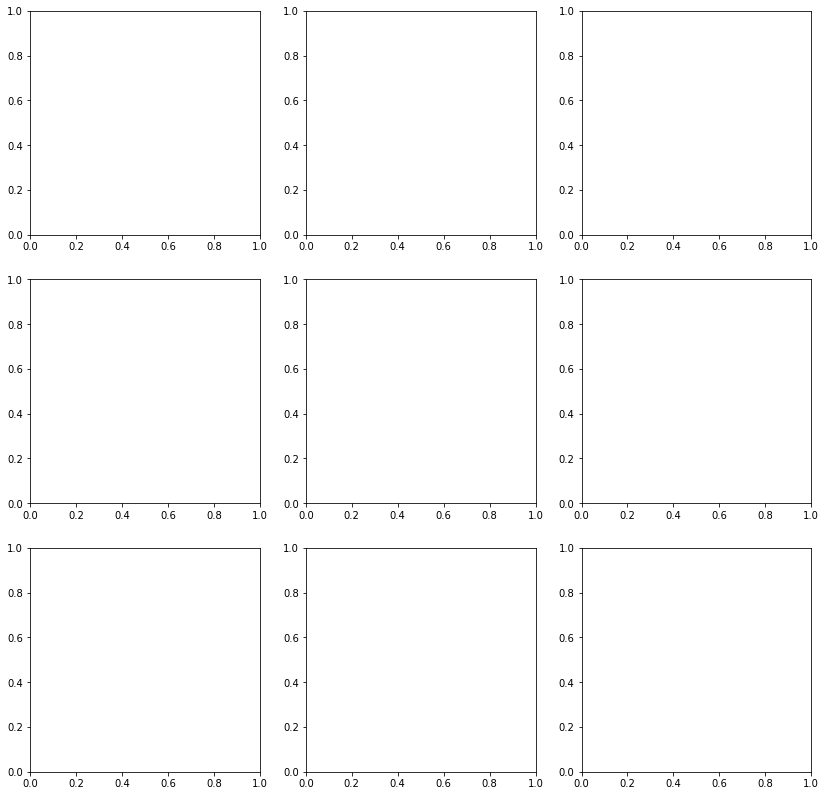

In [61]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))

for (linkage, n), ax in zip(hierarchical_clustering_algorithms, axs.flatten()):
    clusterer = hierarchical_clustering_algorithms[(linkage, n)]
    clusterer.fit(all_strains_vec)
    labels = clusterer.labels_
    ax.axis('off')
    ax.scatter(all_strains_vec[:, 0], all_strains_vec[:, 1], c=labels)
    ax.set_title(f"{linkage}, {n}")

In [307]:
vec2stack = [blu_dream_vec, sour_d_vec, gdp_vec]
stacked_vec = np.concatenate((blu_dream_vec, gdp_vec))

ValueError: cannot reshape array of size 4218915 into shape (1,)

In [270]:
cluster = AgglomerativeClustering(affinity='cosine')

In [306]:
cluster.fit(stacked_vec)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.